In [2]:
import numpy as np
import matplotlib.pyplot as plt


import h5py
import matplotlib.cm as cm
from enum import Enum
from matplotlib.colors import LogNorm
import collections

from mpl_toolkits.axes_grid1 import make_axes_locatable


%matplotlib inline

class FIELD(Enum):      
        FLUENCE = [1,['0_0', '0_1', '0_2', '0_3', '0_4', '0_5']]
        OUT = [1,['1_0', '1_1','1_2','1_3','1_4','1_5']]
        
        
def loadVarComp(filePath, fld, comp):           
        f = h5py.File(filePath, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        VAR0_name = 'vars/'+fld.value[1][0]
        SHAPE = f[VAR0_name].shape    
        Lx=SHAPE[0]
        Ly=SHAPE[1]
        Lz=SHAPE[2]
        data = np.zeros([Lx, Ly, Lz])
        VAR_name = 'vars/'+fld.value[1][comp]
        data[...] = f[VAR_name]
            
        f.close()
        return data 
    


(460, 460)
10.704618689581096


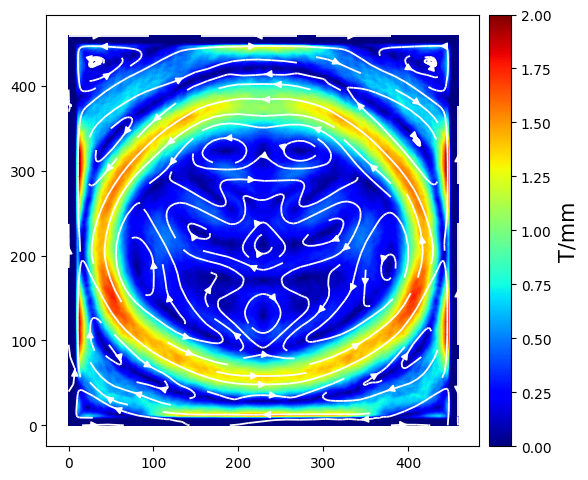

In [3]:
filePath = 'PATH2PRJT/APA/output_las/'
fileNamePat =  'proto_'
time=5
b_x = loadVarComp(filePath+fileNamePat+str(time)+'.h5', FIELD.OUT , 0)[...,0]
b_y = loadVarComp(filePath+fileNamePat+str(time)+'.h5', FIELD.OUT , 1)[...,0]
print(b_x.shape)


dri = (0.005-0.04); # Difference between central position and mean position of fields
ri = 0.966+dri
rs = 9-dri #cm
V = 4.17e9

mag = (rs+ri)/(ri)
print(mag)

mp = 1.67e-24 #g
qe = 4.803e-10 #CGS
c = 3.0e10 #cm/s

b_x = mp*c/qe*(mag*V)*b_x/rs
b_y = mp*c/qe*(mag*V)*b_y/rs
magb = np.sqrt(b_x**2+b_y**2)


X  = np.arange(0, b_y.shape[0])
Y  = np.arange(0, b_y.shape[1])

fig, axA = plt.subplots(nrows=1, ncols=1, figsize = [6, 6], dpi = 100)
img = axA.imshow((magb)*1e-3, cmap='jet', aspect='equal', vmax=2,   origin = 'lower',) 

axA.streamplot( Y, X, -b_x, b_y,  color = 'w',linewidth = 1.3)


divider = make_axes_locatable(axA)
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar = plt.colorbar(img, cax=cax, orientation='vertical')

cbar.set_label('T/mm', rotation=90,labelpad=5, size=15)

